#### Preguntas:
- ¿cómo se distribuyen los SI/NO en variables ofv - vs?
- ¿hay variables vs y ofv **completamente** NO?


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
llamados= pd.read_excel('dataset_d_normf.xlsx',
                        dtype= {'llamado_fecha_hora': 'datetime64[ns]','llamado_fecha': 'datetime64[ns]',
                                'llamado_provincia': 'category','llamado_provincia_id': 'category',
                                'llamante_edad': 'Int64','llamante_genero': 'category','llamante_vinculo': 'category',
                                'caso_judicializado': 'category','hecho_lugar': 'category',
                                'victima_a_resguardo': 'category','victima_edad': 'Int64',
                                'victima_genero': 'category','victima_nacionalidad': 'category',
                                'victima_vinculo_agresor': 'category','victima_discapacidad': 'category',
                                'victima_convive_agresor': 'category','vs_violacion_via_vaginal': 'category',
                                'vs_violacion_via_anal': 'category','vs_violacion_via_oral': 'category',
                                'vs_tentativa_violacion': 'category','vs_tocamiento_sexual': 'category',
                                'vs_intento_tocamiento': 'category','vs_Intento_violación_tercera_persona': 'category',
                                'vs_grooming': 'category','vs_exhibicionismo': 'category',
                                'vs_amenazas_verbales_contenido_sexual': 'category','vs_explotacion_sexual': 'category',
                                'vs_explotacion_sexual_comercial': 'category',
                                'vs_explotacion_sexual_viajes_turismo': 'category',
                                'vs_sospecha_trata_personas_fines_sexuales': 'category',
                                'vs_existencia_facilitador_corrupcion_nnya': 'category',
                                'vs_obligacion_sacarse_fotos_pornograficas': 'category',
                                'vs_eyaculacion_partes_cuerpo': 'category','vs_acoso_sexual': 'category',
                                'vs_iniciacion_sexual_forzada_inducida': 'category',
                                'vs_otra_forma_violencia_sexual': 'category','vs_no_sabe_no_contesta': 'category',
                                'ofv_sentimiento_amenaza': 'category','ofv_amenaza_explicita': 'category',
                                'ofv_violencia_fisica': 'category','ofv_intento_ahorcar': 'category',
                                'ofv_intento_quemar': 'category','ofv_intento_ahogar': 'category',
                                'ofv_amenaza_muerte': 'category','ofv_uso_sustancias_psicoactivas': 'category',
                                'ofv_intento_privacion_libertad': 'category','ofv_privacion_libertad': 'category',
                                'ofv_uso_arma_blanca': 'category','ofv_uso_arma_fuego': 'category',
                                'ofv_enganio_seduccion': 'category','ofv_intento_matar': 'category',
                                'ofv_uso_animal_victimizar': 'category','ofv_grooming': 'category',
                                'ofv_otra_forma_violencia': 'category','ofv_no_sabe_no_contesta': 'category'})

In [12]:
llamados.head()

,llamado_fecha_hora,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,2016-11-19 12:46:38,2016-11-19,12:46:38,Misiones,54.0,30,Femenino,Hospital,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,2016-11-19 13:46:24,2016-11-19,13:46:24,CABA,2.0,<NA>,Femenino,Madre,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO
2,2016-11-19 18:20:08,2016-11-19,18:20:08,Tucumán,90.0,47,Femenino,Víctima,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


## Chequear variables vacías

Obtener el value counts de cada variable de violencia (vs y ofv) para ver si hay columnas que sean completamente NO o completamente N/A

In [18]:
llamados.shape

(19143, 56)

In [81]:
# violencia sexual

llamados.columns[17:38]

Index(['vs_violacion_via_vaginal', 'vs_violacion_via_anal',
       'vs_violacion_via_oral', 'vs_tentativa_violacion',
       'vs_tocamiento_sexual', 'vs_intento_tocamiento',
       'vs_Intento_violación_tercera_persona', 'vs_grooming',
       'vs_exhibicionismo', 'vs_amenazas_verbales_contenido_sexual',
       'vs_explotacion_sexual', 'vs_explotacion_sexual_comercial',
       'vs_explotacion_sexual_viajes_turismo',
       'vs_sospecha_trata_personas_fines_sexuales',
       'vs_existencia_facilitador_corrupcion_nnya',
       'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida',
       'vs_otra_forma_violencia_sexual', 'vs_no_sabe_no_contesta'],
      dtype='object')

In [82]:
# otras formas de violencia

llamados.columns[38:]

Index(['ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_intento_ahorcar', 'ofv_intento_quemar',
       'ofv_intento_ahogar', 'ofv_amenaza_muerte',
       'ofv_uso_sustancias_psicoactivas', 'ofv_intento_privacion_libertad',
       'ofv_privacion_libertad', 'ofv_uso_arma_blanca', 'ofv_uso_arma_fuego',
       'ofv_enganio_seduccion', 'ofv_intento_matar',
       'ofv_uso_animal_victimizar', 'ofv_grooming', 'ofv_otra_forma_violencia',
       'ofv_no_sabe_no_contesta'],
      dtype='object')

### Trabajar con value_counts

In [232]:
lista_vc = []
for column in llamados.columns[17:]:
    if llamados[column].dtype=='category':
        lista_vc.append(llamados[column].value_counts(dropna=False))

In [233]:
# columnas con 15 o menos SI

for i in range(len(lista_vc)):
    if lista_vc[i][1]<=30:
        print(lista_vc[i])

NO    19122
SI       21
Name: vs_Intento_violación_tercera_persona, dtype: int64
NO    19139
SI        4
Name: vs_explotacion_sexual_viajes_turismo, dtype: int64
NO    19116
SI       27
Name: vs_sospecha_trata_personas_fines_sexuales, dtype: int64
NO    19133
SI       10
Name: ofv_intento_ahorcar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_quemar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_ahogar, dtype: int64
NO    19120
SI       23
Name: ofv_uso_arma_fuego, dtype: int64
NO    19141
SI        2
Name: ofv_intento_matar, dtype: int64
NO    19137
SI        6
Name: ofv_uso_animal_victimizar, dtype: int64


In [234]:
# columnas con 10 o menos SI
for i in range(len(lista_vc)):
    if lista_vc[i][1]<=10:
        print(lista_vc[i])

NO    19139
SI        4
Name: vs_explotacion_sexual_viajes_turismo, dtype: int64
NO    19133
SI       10
Name: ofv_intento_ahorcar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_quemar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_ahogar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_matar, dtype: int64
NO    19137
SI        6
Name: ofv_uso_animal_victimizar, dtype: int64


In [235]:
## columnas con menos de 5 SI

for i in range(len(lista_vc)):
    if lista_vc[i][1]<5:
        print(lista_vc[i])

NO    19139
SI        4
Name: vs_explotacion_sexual_viajes_turismo, dtype: int64
NO    19141
SI        2
Name: ofv_intento_quemar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_ahogar, dtype: int64
NO    19141
SI        2
Name: ofv_intento_matar, dtype: int64


### Contabilizar y graficar vs y ofv

In [4]:
vs_val_count = llamados.iloc[:,17:38].apply(pd.Series.value_counts)
ofv_val_count = llamados.iloc[:,38:].apply(pd.Series.value_counts)

In [5]:
vs_val_count

,vs_violacion_via_vaginal,vs_violacion_via_anal,vs_violacion_via_oral,vs_tentativa_violacion,vs_tocamiento_sexual,vs_intento_tocamiento,vs_Intento_violación_tercera_persona,vs_grooming,vs_exhibicionismo,vs_amenazas_verbales_contenido_sexual,...,vs_explotacion_sexual_comercial,vs_explotacion_sexual_viajes_turismo,vs_sospecha_trata_personas_fines_sexuales,vs_existencia_facilitador_corrupcion_nnya,vs_obligacion_sacarse_fotos_pornograficas,vs_eyaculacion_partes_cuerpo,vs_acoso_sexual,vs_iniciacion_sexual_forzada_inducida,vs_otra_forma_violencia_sexual,vs_no_sabe_no_contesta
NO,16910,18485,18586,18861,12675,18658,19122,17230,18722,18998,...,19043,19139,19116,19110,18564,19081,18620,18558,17611,12978
SI,2233,658,557,282,6468,485,21,1913,421,145,...,100,4,27,33,579,62,523,585,1532,6165


In [6]:
ofv_val_count

,ofv_sentimiento_amenaza,ofv_amenaza_explicita,ofv_violencia_fisica,ofv_intento_ahorcar,ofv_intento_quemar,ofv_intento_ahogar,ofv_amenaza_muerte,ofv_uso_sustancias_psicoactivas,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
NO,13396,17563,18579,19133,19141,19141,19059,18987,19106,19051,19112,19120,18880,19141,19137,18835,17802,8211
SI,5747,1580,564,10,2,2,84,156,37,92,31,23,263,2,6,308,1341,10932


In [7]:
# categoría as variable

vs_val_count = vs_val_count.reset_index()
vs_val_count.rename(columns = {'index':'categoria'}, inplace = True)
vs_val_count

,categoria,vs_violacion_via_vaginal,vs_violacion_via_anal,vs_violacion_via_oral,vs_tentativa_violacion,vs_tocamiento_sexual,vs_intento_tocamiento,vs_Intento_violación_tercera_persona,vs_grooming,vs_exhibicionismo,...,vs_explotacion_sexual_comercial,vs_explotacion_sexual_viajes_turismo,vs_sospecha_trata_personas_fines_sexuales,vs_existencia_facilitador_corrupcion_nnya,vs_obligacion_sacarse_fotos_pornograficas,vs_eyaculacion_partes_cuerpo,vs_acoso_sexual,vs_iniciacion_sexual_forzada_inducida,vs_otra_forma_violencia_sexual,vs_no_sabe_no_contesta
0,NO,16910,18485,18586,18861,12675,18658,19122,17230,18722,...,19043,19139,19116,19110,18564,19081,18620,18558,17611,12978
1,SI,2233,658,557,282,6468,485,21,1913,421,...,100,4,27,33,579,62,523,585,1532,6165


In [8]:
vs_val_count.to_excel("vs_val_count.xlsx", index=False)

In [9]:
# categoría as variable

ofv_val_count = ofv_val_count.reset_index()
ofv_val_count.rename(columns = {'index':'categoria'}, inplace = True)
ofv_val_count

,categoria,ofv_sentimiento_amenaza,ofv_amenaza_explicita,ofv_violencia_fisica,ofv_intento_ahorcar,ofv_intento_quemar,ofv_intento_ahogar,ofv_amenaza_muerte,ofv_uso_sustancias_psicoactivas,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,NO,13396,17563,18579,19133,19141,19141,19059,18987,19106,19051,19112,19120,18880,19141,19137,18835,17802,8211
1,SI,5747,1580,564,10,2,2,84,156,37,92,31,23,263,2,6,308,1341,10932


In [10]:
ofv_val_count.to_excel("ofv_val_count.xlsx", index=False)

In [12]:
vs_wide_to_long = vs_val_count.melt('categoria', var_name='columnas', value_name='valor')
vs_wide_to_long.head()

,categoria,columnas,valor
0,NO,vs_violacion_via_vaginal,16910
1,SI,vs_violacion_via_vaginal,2233
2,NO,vs_violacion_via_anal,18485
3,SI,vs_violacion_via_anal,658
4,NO,vs_violacion_via_oral,18586


In [13]:
vs_wide_to_long.to_excel("vs_val_count.xlsx", index=False)

In [248]:
#df.sort(['name_sort','A','B'], ascending=[1,1,0])

vs_wide_to_long_sort = vs_wide_to_long.sort_values(['valor'], ascending=False)
#vs_wide_to_long_sort

,categoria,columnas,valor
24,NO,vs_explotacion_sexual_viajes_turismo,19139
12,NO,vs_Intento_violación_tercera_persona,19122
26,NO,vs_sospecha_trata_personas_fines_sexuales,19116
28,NO,vs_existencia_facilitador_corrupcion_nnya,19110
32,NO,vs_eyaculacion_partes_cuerpo,19081
22,NO,vs_explotacion_sexual_comercial,19043
18,NO,vs_amenazas_verbales_contenido_sexual,18998
6,NO,vs_tentativa_violacion,18861
16,NO,vs_exhibicionismo,18722
10,NO,vs_intento_tocamiento,18658


In [14]:
ofv_wide_to_long = ofv_val_count.melt('categoria', var_name='columnas', value_name='valor')
ofv_wide_to_long.head()

,categoria,columnas,valor
0,NO,ofv_sentimiento_amenaza,13396
1,SI,ofv_sentimiento_amenaza,5747
2,NO,ofv_amenaza_explicita,17563
3,SI,ofv_amenaza_explicita,1580
4,NO,ofv_violencia_fisica,18579


In [15]:
ofv_wide_to_long.to_excel("ofv_val_count.xlsx", index=False)

In [306]:
ofv_wide_to_long_sort = ofv_wide_to_long.sort_values(['valor'], ascending=False)
ofv_wide_to_long_sort.head()

,categoria,columnas,valor
8,NO,ofv_intento_quemar,19141
26,NO,ofv_intento_matar,19141
10,NO,ofv_intento_ahogar,19141
28,NO,ofv_uso_animal_victimizar,19137
6,NO,ofv_intento_ahorcar,19133


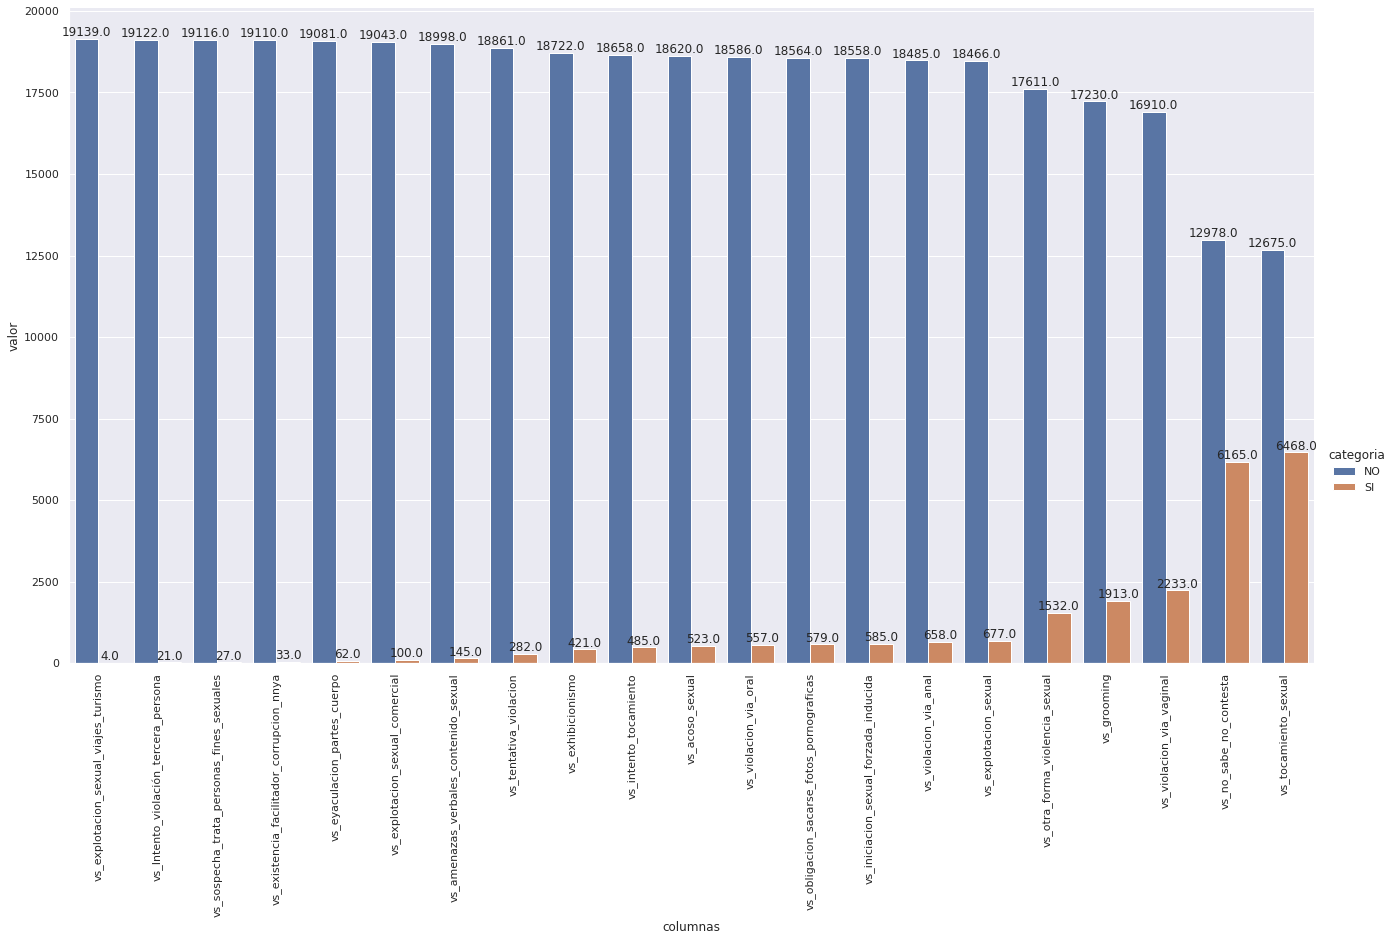

In [305]:
g = sns.catplot(x="columnas", y="valor", hue="categoria", kind="bar", data=vs_wide_to_long_sort, height=10, aspect=15/8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show(g)
#plt.savefig('vs_catplot.png')



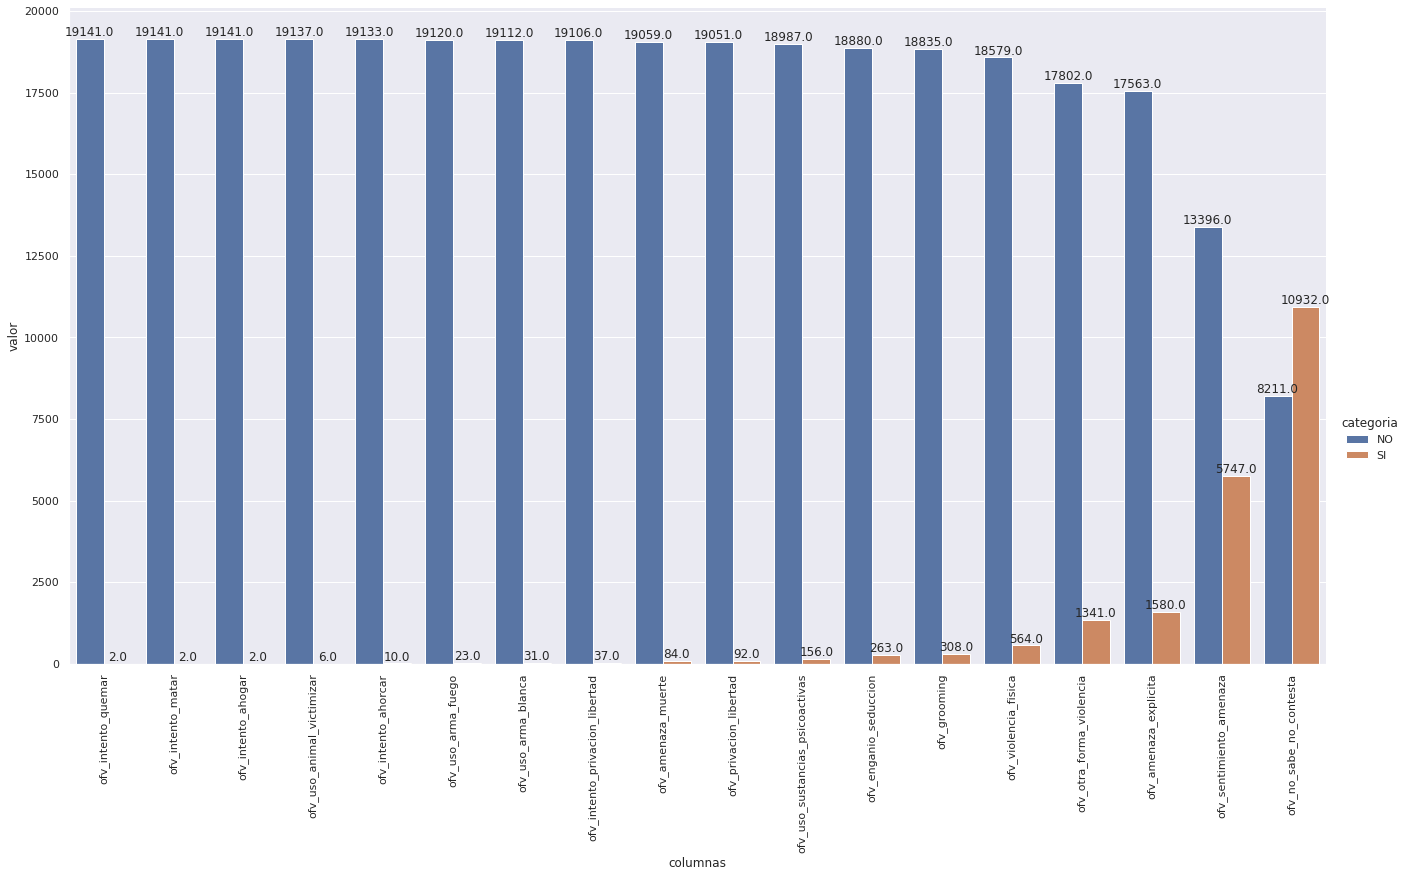

In [314]:
ofv = sns.catplot(x="columnas", y="valor", hue="categoria", kind="bar", data=ofv_wide_to_long_sort, height=10, aspect=15/8)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = ofv.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [v.get_height() for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')



plt.show(ofv)
#plt.savefig('ofv_catplot.png')
ofv.figure.savefig("ofv_catplot.png")